In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [6]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.40899 stdev: 0.19389
Best fitness: 0.97228 - size: (2, 7) - species 1 - id 129
Average adjusted fitness: 0.380
Mean genetic distance 2.808, standard deviation 0.483
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 3.805 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.49949 stdev: 0.23215
Best fitness: 0.97228 - size: (2, 7) - species 5 - id 129
Average adjusted fitness: 0.468
Mean genetic distance 2.990, standard deviation 0.526
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 3.920 sec (3.862 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58724 stdev: 0.22942
Best fitness: 0.98904 - size: (4, 9) - species 1 - id 531
Average adjusted fitness: 0.516
Mean genetic distance 3.040, standard deviation 0.500
Population of 200 members in 31 species
Total extinctions

Population's average fitness: 0.52775 stdev: 0.11666
Best fitness: 0.97000 - size: (4, 10) - species 10 - id 422
Average adjusted fitness: 0.390
Mean genetic distance 3.017, standard deviation 0.540
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.452 sec (5.499 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53707 stdev: 0.12485
Best fitness: 0.97000 - size: (4, 10) - species 10 - id 422
Average adjusted fitness: 0.470
Mean genetic distance 2.962, standard deviation 0.533
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 6.306 sec (5.633 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54691 stdev: 0.13236
Best fitness: 0.97000 - size: (4, 10) - species 10 - id 422
Average adjusted fitness: 0.509
Mean genetic distance 2.971, standard deviation 0.521
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 5.957 sec (5.680 average)

 ****** Runn

Population's average fitness: 0.59698 stdev: 0.22021
Best fitness: 0.97512 - size: (4, 10) - species 29 - id 765
Average adjusted fitness: 0.313
Mean genetic distance 2.917, standard deviation 0.495
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 4.575 sec (4.519 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59117 stdev: 0.22754
Best fitness: 0.97512 - size: (4, 10) - species 29 - id 765
Average adjusted fitness: 0.295
Mean genetic distance 2.921, standard deviation 0.497
Population of 211 members in 32 species
Total extinctions: 0
Generation time: 5.680 sec (4.635 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59023 stdev: 0.23317
Best fitness: 0.97512 - size: (4, 10) - species 29 - id 765
Average adjusted fitness: 0.531
Mean genetic distance 2.965, standard deviation 0.512
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 4.915 sec (4.689 average)

 ****** Run

Population's average fitness: 0.60332 stdev: 0.22318
Best fitness: 0.94877 - size: (4, 12) - species 8 - id 913
Average adjusted fitness: 0.387
Mean genetic distance 3.073, standard deviation 0.495
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.109 sec (5.609 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58792 stdev: 0.22603
Best fitness: 0.94877 - size: (4, 12) - species 8 - id 913
Average adjusted fitness: 0.373
Mean genetic distance 3.087, standard deviation 0.498
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.621 sec (5.632 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60383 stdev: 0.22231
Best fitness: 0.94877 - size: (4, 12) - species 8 - id 913
Average adjusted fitness: 0.299
Mean genetic distance 3.079, standard deviation 0.520
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.034 sec (5.777 average)

 ****** Runni


Population's average fitness: 0.60482 stdev: 0.17250
Best fitness: 0.98626 - size: (2, 6) - species 5 - id 519
Average adjusted fitness: 0.191
Mean genetic distance 3.036, standard deviation 0.541
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 6.831 sec (7.183 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60971 stdev: 0.18534
Best fitness: 0.98626 - size: (2, 6) - species 3 - id 519
Average adjusted fitness: 0.497
Mean genetic distance 3.080, standard deviation 0.548
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.826 sec (7.142 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60631 stdev: 0.18026
Best fitness: 0.98626 - size: (2, 6) - species 3 - id 519
Average adjusted fitness: 0.198
Mean genetic distance 3.084, standard deviation 0.567
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 7.006 sec (7.176 average)

 ****** Running


 ****** Running generation 0 ****** 

Population's average fitness: 0.47304 stdev: 0.11627
Best fitness: 0.94855 - size: (2, 7) - species 1 - id 179
Average adjusted fitness: 0.410
Mean genetic distance 2.844, standard deviation 0.479
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 2.471 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52402 stdev: 0.14310
Best fitness: 0.94855 - size: (2, 7) - species 1 - id 179
Average adjusted fitness: 0.444
Mean genetic distance 2.974, standard deviation 0.495
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 2.939 sec (2.705 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54015 stdev: 0.15563
Best fitness: 0.96085 - size: (3, 9) - species 22 - id 439
Average adjusted fitness: 0.483
Mean genetic distance 3.057, standard deviation 0.488
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 2.670 sec (2.693 aver

Generation time: 3.111 sec (3.203 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59055 stdev: 0.15860
Best fitness: 0.92624 - size: (3, 9) - species 19 - id 717
Average adjusted fitness: 0.468
Mean genetic distance 3.118, standard deviation 0.542
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 3.807 sec (3.304 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59972 stdev: 0.17231
Best fitness: 0.92624 - size: (3, 9) - species 19 - id 717
Average adjusted fitness: 0.498
Mean genetic distance 3.123, standard deviation 0.541
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 3.548 sec (3.339 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61772 stdev: 0.16870
Best fitness: 0.92624 - size: (3, 9) - species 19 - id 717
Average adjusted fitness: 0.307
Mean genetic distance 3.109, standard deviation 0.541
Population of 201 members in 43 specie

Population's average fitness: 0.69059 stdev: 0.24144
Best fitness: 0.99011 - size: (4, 11) - species 21 - id 449
Average adjusted fitness: 0.670
Mean genetic distance 3.078, standard deviation 0.546
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.775 sec (4.527 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66876 stdev: 0.24822
Best fitness: 0.99011 - size: (4, 11) - species 21 - id 449
Average adjusted fitness: 0.624
Mean genetic distance 3.064, standard deviation 0.541
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.198 sec (4.788 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65100 stdev: 0.26103
Best fitness: 0.99011 - size: (4, 11) - species 21 - id 449
Average adjusted fitness: 0.613
Mean genetic distance 3.081, standard deviation 0.546
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 5.102 sec (4.902 average)

 ****** Ru

Population's average fitness: 0.56571 stdev: 0.18594
Best fitness: 0.71148 - size: (2, 8) - species 2 - id 396
Average adjusted fitness: 0.267
Mean genetic distance 3.101, standard deviation 0.560
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 5.605 sec (4.341 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55185 stdev: 0.19073
Best fitness: 0.71148 - size: (2, 8) - species 2 - id 396
Average adjusted fitness: 0.250
Mean genetic distance 3.083, standard deviation 0.560
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 4.852 sec (4.437 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.55289 stdev: 0.19044
Best fitness: 0.71148 - size: (2, 8) - species 2 - id 396
Average adjusted fitness: 0.261
Mean genetic distance 3.069, standard deviation 0.554
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 4.889 sec (4.532 average)

 ****** Running 

Population's average fitness: 0.62299 stdev: 0.19481
Best fitness: 0.93501 - size: (5, 13) - species 17 - id 2170
Average adjusted fitness: 0.396
Mean genetic distance 3.089, standard deviation 0.514
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 4.625 sec (4.838 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60179 stdev: 0.20882
Best fitness: 0.93501 - size: (5, 13) - species 17 - id 2170
Average adjusted fitness: 0.283
Mean genetic distance 3.106, standard deviation 0.516
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 5.242 sec (4.901 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.57996 stdev: 0.21523
Best fitness: 0.93501 - size: (5, 13) - species 17 - id 2170
Average adjusted fitness: 0.363
Mean genetic distance 3.076, standard deviation 0.510
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 4.702 sec (4.804 average)
number o

Population's average fitness: 0.52195 stdev: 0.04760
Best fitness: 0.85650 - size: (2, 7) - species 1 - id 149
Average adjusted fitness: 0.145
Mean genetic distance 2.912, standard deviation 0.502
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 2.157 sec (2.092 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52528 stdev: 0.06662
Best fitness: 0.85650 - size: (2, 7) - species 14 - id 149
Average adjusted fitness: 0.315
Mean genetic distance 2.907, standard deviation 0.513
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 2.387 sec (2.190 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53078 stdev: 0.07578
Best fitness: 0.86102 - size: (3, 9) - species 15 - id 599
Average adjusted fitness: 0.418
Mean genetic distance 2.908, standard deviation 0.538
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 3.620 sec (2.548 average)

 ****** Running 

Mean genetic distance 3.039, standard deviation 0.528
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 6.116 sec (4.478 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62237 stdev: 0.17154
Best fitness: 0.72195 - size: (5, 13) - species 20 - id 925
Average adjusted fitness: 0.326
Mean genetic distance 3.027, standard deviation 0.532
Population of 208 members in 31 species
Total extinctions: 0
Generation time: 4.882 sec (4.536 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61596 stdev: 0.17671
Best fitness: 0.72195 - size: (5, 13) - species 27 - id 925
Average adjusted fitness: 0.324
Mean genetic distance 3.036, standard deviation 0.521
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 4.343 sec (4.512 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62662 stdev: 0.17022
Best fitness: 0.72195 - size: (5, 13) - species 27 - id 925
Averag

Population's average fitness: 0.62824 stdev: 0.17934
Best fitness: 0.89125 - size: (7, 19) - species 9 - id 1523
Average adjusted fitness: 0.332
Mean genetic distance 2.996, standard deviation 0.478
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 6.456 sec (4.727 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62777 stdev: 0.18799
Best fitness: 0.89125 - size: (7, 19) - species 9 - id 1523
Average adjusted fitness: 0.429
Mean genetic distance 2.996, standard deviation 0.465
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 4.496 sec (4.786 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62071 stdev: 0.19431
Best fitness: 0.89125 - size: (7, 19) - species 9 - id 1523
Average adjusted fitness: 0.399
Mean genetic distance 3.043, standard deviation 0.477
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 4.913 sec (4.868 average)

 ****** Ru

In [8]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [14]:
np.sum(list_P == testy)/2000

0.7225

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[2] real:2
#1 index:[2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2] real:3
#6 index:[5] real:3
#7 index:[5] real:3
#8 index:[2] real:3
#9 index:[2] real:3
#10 index:[5] real:3
#11 index:[2] real:3
#12 index:[2] real:3
#13 index:[2] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[5] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[2] real:2
#24 index:[2] real:2
#25 index:[5] real:2
#26 index:[2] real:2
#27 index:[4] real:4
#28 index:[5] real:5
#29 index:[5] real:5
#30 index:[5] real:5
#31 index:[4] real:4
#32 index:[2] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[5] real:3
#37 index:[5] real:3
#38 index:[5] real:3
#39 index:[5] real:3
#40 index:[5] real:3
#41 index:[4] real:3
#42 index:[2] real:2
#43 index:[2] real:2
#44 index:[2] real:2
#45 index:[2] real:2
#46 index:[5] real:2
#47 index:[2] real:2
#4

#758 index:[5] real:5
#759 index:[5] real:5
#760 index:[5] real:5
#761 index:[4] real:4
#762 index:[4] real:4
#763 index:[4] real:4
#764 index:[4 5] real:4
#765 index:[2] real:3
#766 index:[5] real:3
#767 index:[1 5] real:1
#768 index:[1] real:1
#769 index:[1] real:1
#770 index:[1] real:1
#771 index:[1] real:1
#772 index:[2 3 5] real:2
#773 index:[2] real:2
#774 index:[2] real:2
#775 index:[2] real:2
#776 index:[5] real:2
#777 index:[2] real:2
#778 index:[5] real:2
#779 index:[5] real:2
#780 index:[5] real:5
#781 index:[5] real:5
#782 index:[2 3 5] real:5
#783 index:[5] real:5
#784 index:[5] real:5
#785 index:[5] real:5
#786 index:[5] real:5
#787 index:[5] real:5
#788 index:[5] real:5
#789 index:[5] real:5
#790 index:[2] real:5
#791 index:[5] real:5
#792 index:[4 5] real:4
#793 index:[5] real:4
#794 index:[5] real:3
#795 index:[5] real:3
#796 index:[1] real:1
#797 index:[1] real:1
#798 index:[1] real:1
#799 index:[1] real:1
#800 index:[1] real:1
#801 index:[2] real:2
#802 index:[2] rea

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[425   0   5   0   8   0]
 [  1 200   0   0   8   0]
 [ 11   0 290  97   3  86]
 [  1   2   5   2   7  16]
 [ 17  15   0   5 169   9]
 [  6   7  97 107  42 359]]


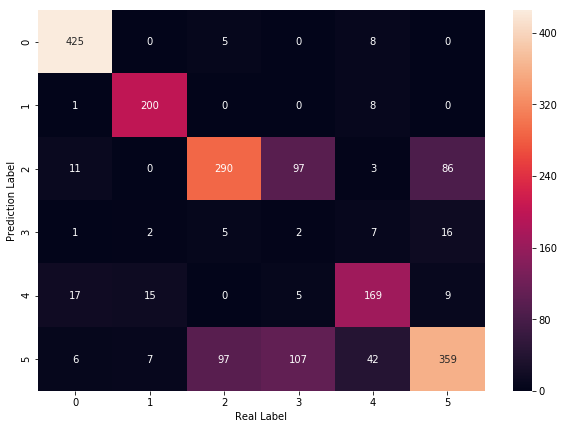

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()